In [52]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy
import os
from sklearn.model_selection import train_test_split
# turn off pink boxes for demo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire
import prepare

ModuleNotFoundError: No module named 'prepare'

In [2]:
import acquire
df = acquire.get_telco_data()


In [3]:
acquire.split_telco_data(df)

(      internet_service_type_id  payment_type_id  contract_type_id customer_id  \
 5310                         1                3                 3  7503-MIOGA   
 3790                         1                4                 3  5329-KRDTM   
 4398                         2                1                 2  6199-IWKGC   
 2635                         1                1                 1  3748-FVMZZ   
 2986                         1                2                 1  4280-DLSHD   
 ...                        ...              ...               ...         ...   
 6230                         2                1                 3  8809-RIHDD   
 356                          1                1                 1  0523-VNGTF   
 2128                         2                1                 2  3058-HJCUY   
 3586                         1                2                 2  5081-NWSUP   
 6817                         2                1                 1  9681-KYGYB   
 
       gender 

In [4]:
#prep telco data
df = acquire.prep_telco(df)
train, validate, test = df

In [7]:
train = train.drop(columns= ['customer_id','dependents','gender','multiple_lines','tech_support','paperless_billing'])

train = train.replace({'Yes':1, 'No':0})

validate = validate.drop(columns= ['customer_id','dependents','gender','multiple_lines','tech_support','paperless_billing',])

validate = validate.replace({'Yes':1, 'No':0})


In [8]:

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn','churn_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn','churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn','churn_Yes'])
y_test = test.churn_Yes

In [9]:
train.churn_Yes.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [10]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
baseline_accuracy = (train.churn_Yes == 0).mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [11]:
clf = clf.fit(X_train, y_train)

In [12]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=10, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)


In [13]:
train

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Male,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,tech_support_No internet service,tech_support_Yes,paperless_billing_Yes,churn_Yes
5919,1,4,2,0,58,71.10,4299.20,0,0,0,0,1,0,1,1,0
1915,2,4,2,0,71,85.45,6028.95,0,1,1,0,1,0,0,1,0
5054,3,1,1,0,35,25.75,882.55,0,0,1,0,1,1,0,1,0
2355,3,2,1,0,1,19.20,19.20,0,1,1,0,0,1,0,0,0
6279,1,2,2,1,20,54.00,1055.90,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2,4,1,0,24,88.95,2072.75,0,0,0,0,1,0,0,1,0
3763,2,1,1,0,10,100.25,1064.65,1,0,1,0,1,0,0,1,1
3444,3,4,3,0,22,25.25,555.40,0,0,1,0,1,1,0,0,0
1002,2,4,1,0,22,89.10,1949.40,0,1,1,0,1,0,0,1,0


[Text(362.7, 332.955, 'contract_type_id <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(181.35, 237.825, 'monthly_charges <= 69.225\ngini = 0.49\nsamples = 2165\nvalue = [1238, 927]\nclass = 0'),
 Text(90.675, 142.695, 'tenure <= 5.5\ngini = 0.408\nsamples = 954\nvalue = [682, 272]\nclass = 0'),
 Text(45.3375, 47.565, 'gini = 0.489\nsamples = 440\nvalue = [253, 187]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.276\nsamples = 514\nvalue = [429, 85]\nclass = 0'),
 Text(272.025, 142.695, 'total_charges <= 1486.825\ngini = 0.497\nsamples = 1211\nvalue = [556, 655]\nclass = 1'),
 Text(226.6875, 47.565, 'gini = 0.433\nsamples = 607\nvalue = [192, 415]\nclass = 1'),
 Text(317.3625, 47.565, 'gini = 0.479\nsamples = 604\nvalue = [364, 240]\nclass = 0'),
 Text(544.05, 237.825, 'monthly_charges <= 93.775\ngini = 0.125\nsamples = 1772\nvalue = [1653, 119]\nclass = 0'),
 Text(453.375, 142.695, 'contract_type_id <= 2.5\ngini = 0.072\nsamples = 1328\nvalue = [1278, 50

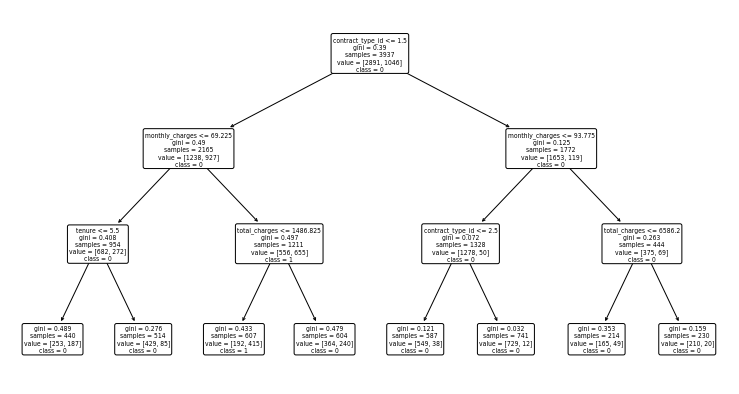

In [14]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [15]:
baseline_prediction = y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.93526405, 0.06473595],
       [0.93526405, 0.06473595],
       [0.83463035, 0.16536965],
       [0.575     , 0.425     ],
       [0.93526405, 0.06473595]])

In [16]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [17]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2891
           1       0.68      0.40      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.67      0.68      3937
weighted avg       0.78      0.79      0.77      3937



In [18]:
confusion_matrix(y_train, y_pred)

array([[2699,  192],
       [ 631,  415]])

In [19]:
pd.crosstab(y_train, y_pred)

col_0,0,1
churn_Yes,,
0,2699,192
1,631,415


In [20]:
y_pred = clf.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2891
           1       0.68      0.40      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.67      0.68      3937
weighted avg       0.78      0.79      0.77      3937



In [21]:
churn_pred_prob = pd.DataFrame(clf.predict_proba(X_train))
churn_pred_prob

,0,1
0,0.935264,0.064736
1,0.935264,0.064736
2,0.834630,0.165370
3,0.575000,0.425000
4,0.935264,0.064736
...,...,...
3932,0.602649,0.397351
3933,0.316310,0.683690
3934,0.983806,0.016194
3935,0.602649,0.397351


In [22]:

TP = 2699
FP = 192
FN = 631
TN = 415
ALL = TP + FP + FN + TN
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")
false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")
true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")
false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")
precision = TP/(TP+FP)
print(f"Precision: {precision}")
recall = TP/(TP+FN)
print(f"Recall: {recall}")
f1_score = 2* (precision*recall)/ (precision+recall)
print (f"Fl_Score: {f1_score}")
support_pos = TP + FN
print ("Support (0): {support_pos}")
support_neg = FP + TN
print (f"Support (1): {support_neg}")

Accuracy: 0.7909575819151639
True Positive Rate: 0.8105105105105105
False Positive Rate: 0.3163097199341021
True Negative Rate: 0.6836902800658978
False Negative Rate: 0.1894894894894895
Precision: 0.9335869941196818
Recall: 0.8105105105105105
Fl_Score: 0.8677061565664684
Support (0): {support_pos}
Support (1): 607


In [23]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,2699,192
1,631,415


In [24]:
clf = DecisionTreeClassifier(max_depth=8, random_state=123)
clf = clf.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
# confusion matrix

confusion_matrix(y_train, y_pred)

Accuracy of Decision Tree classifier on training set: 0.84


array([[2699,  192],
       [ 631,  415]])

In [25]:
x = clf.score(X_validate,y_validate)
x

0.7541469194312796

In [26]:
y = clf.score(X_validate,y_validate)
y

0.7541469194312796

In [27]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [28]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.89


In [29]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2891
           1       0.71      0.70      0.70      1046

    accuracy                           0.84      3937
   macro avg       0.80      0.80      0.80      3937
weighted avg       0.84      0.84      0.84      3937



In [30]:
y_pred = rf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2891
           1       0.84      0.73      0.78      1046

    accuracy                           0.89      3937
   macro avg       0.87      0.84      0.85      3937
weighted avg       0.89      0.89      0.89      3937



In [31]:
confusion_matrix(y_train, y_pred)

array([[2743,  148],
       [ 280,  766]])

In [32]:
TP = 2743
FP = 148
FN = 280
TN = 766
ALL = TP + FP + FN + TN
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")
false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")
true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")
false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")
precision = TP/(TP+FP)
print(f"Precision: {precision}")
recall = TP/(TP+FN)
print(f"Recall: {recall}")
f1_score = 2* (precision*recall)/ (precision+recall)
print (f"Fl_Score: {f1_score}")
support_pos = TP + FN
print ("Support (0): {support_pos}")
support_neg = FP + TN
print (f"Support (1): {support_neg}")

Accuracy: 0.8912877825755652
True Positive Rate: 0.9073767780350646
False Positive Rate: 0.16192560175054704
True Negative Rate: 0.838074398249453
False Negative Rate: 0.0926232219649355
Precision: 0.948806641300588
Recall: 0.9073767780350646
Fl_Score: 0.9276293540750762
Support (0): {support_pos}
Support (1): 914


----------------------------------------------------------------------------------------------------------------------

In [33]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [34]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [35]:
print(confusion_matrix(y_train, y_pred))

[[2669  222]
 [ 445  601]]


In [36]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2891
           1       0.73      0.57      0.64      1046

    accuracy                           0.83      3937
   macro avg       0.79      0.75      0.77      3937
weighted avg       0.82      0.83      0.82      3937



In [37]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.76


In [38]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [39]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.81


In [40]:
print(confusion_matrix(y_train, y_pred))

[[2759  132]
 [ 620  426]]


In [41]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_validate, y_validate)
y_pred = knn.predict(X_validate)
y_pred_proba = knn.predict_proba(X_validate)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.80


In [42]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn.fit(X_validate, y_validate)
y_pred = knn.predict(X_validate)
y_pred_proba = knn.predict_proba(X_validate)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.78


In [43]:
knn.fit(X_validate, y_validate)
y_pred = knn.predict(X_validate)
y_pred_proba = knn.predict_proba(X_validate)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.78


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   internet_service_type_id          3937 non-null   int64  
 1   payment_type_id                   3937 non-null   int64  
 2   contract_type_id                  3937 non-null   int64  
 3   senior_citizen                    3937 non-null   int64  
 4   tenure                            3937 non-null   int64  
 5   monthly_charges                   3937 non-null   float64
 6   total_charges                     3937 non-null   float64
 7   churn                             3937 non-null   int64  
 8   gender_Male                       3937 non-null   uint8  
 9   dependents_Yes                    3937 non-null   uint8  
 10  multiple_lines_No phone service   3937 non-null   uint8  
 11  multiple_lines_Yes                3937 non-null   uint8  
 12  tec

In [45]:
features = ['internet_service_type_id', 'contract_type_id','monthly_charges','gender_Male']

In [46]:
logit = LogisticRegression(random_state=123)

In [47]:
logit = logit.fit(X_train[features], y_train)

In [49]:
baseline = (train.churn == 0).mean()
baseline

0.7343154686309372

In [51]:
X_train = X_train[features]
logit.score(X_train,y_train)

0.7447294894589789